# Введение
Я думаю, нет такого посетителя данной страницы, который не слышал бы о стандарте MP3 (MPEG-1 Layer III), поэтому смысла в долгом вступлении я не вижу. Формат известный во многом благодаря своей компактности и довольно хорошему (с точки зрения равнодушных к Lossless форматам) качеству. Ныне весьма устаревший, однако существующий ещё как в плеерах некоторых меломанов, так и на музыкальных онлайн площадках (возможно, сейчас больше в виде своей реинкарнации - формате AAC).

В силу чего был найден баланс между размером и качеством? Если в кратце, то:
1. это применение блока фильтров (Filter banks);
2. это применение психо-аккустической модели (Psycoacoustic / Perceptual model) в процессе компрессии принебрежимой информации (irrelevance);
3. это применение эффективного кодирования (Entropy coding) в процессе избавления от избытычности (redundancy).

<img src="https://pp.userapi.com/c844720/v844720150/bcd72/80VaKOi-hI8.jpg" width="700">

В данном семинаре будут рассмотрены filter bank'и (см. слайды **02 Filterbanks1, NobleID**  и **03 FilterBanks2**  по этой [ссылке](https://www.tu-ilmenau.de/mt/lehrveranstaltungen/lehre-fuer-master-mt/audio-coding/)).

### Основная идея

В целом, идею можно описать так: у нас есть линейка (гребень, как иногда говорят) параллельных фильтров, каждый из которых последовательно настроен на какую-то свою частоту. Частоты, как правило, нормируют от 0 до $\pi$. Соответсвенно, чем больше мы имеем в своем распоряжении фильтров - тем реже (плавнее) становится шаг перехода от частоты к частоте, а следовательно тем больше вариаций частот мы можем анализировать.

Фильтры в данном контексте - это, как правило, всем, кто сталкивался с обработкой сигналов, известные преобразователи Фурье в той или иной вариации: FFT, [DCT-IV](https://www.tu-ilmenau.de/fileadmin/media/mt/lehre/ma_mt/audiocoding/Lecture_WS2013_14/04_shl_Filterbanks1_NobleID_WS2013-14.pdf), [MDCT](https://www.tu-ilmenau.de/fileadmin/public/mt_ams/Audio_Coding/Vorlesung/WS_2016-17/03_shl_FilterBanks2_WS2016-17.pdf), [PQMF](https://www.tu-ilmenau.de/fileadmin/public/mt_ams/Audio_Coding/Vorlesung/WS_2016-17/07_shl_PQMF_MPEG1-2BC_WS2016-17.pdf) и т.д.


### Ограничение

Нельзя выбирать слишком большое количество фильтров из-за эффекта пре-эхо ![pre-echo](https://pp.userapi.com/c845020/v845020283/b410a/6stmEn7NaXY.jpg) 
- reason: blocks too long (too many bands)

### Конфигурация

Существует несколько методов применения гребенки фильтров. Рассмотри два самых известных:
1. Прямое применение (Direct implementation);
<img src="https://pp.userapi.com/c845523/v845523283/b5477/mN4VMQzDnkE.jpg" width="700">

2. Noble Identities.
<img src="https://pp.userapi.com/c849424/v849424283/3f6aa/FC571JKPJ80.jpg" width="700">


**Домашнее задание**

Объясните, в чем преимущество одного метода над другим?

### Down-sampling и Up-sampling

В процессе применения параллельных фильтров мы волей-неволей увеличиваем количество отсчетов, а соответсвенно частоту воспроизведения и размер обрабатываемого файла. Дабы избежать подобных последсвий применяются две зеркальные процедуры:
1. Down-sampling
<img src="https://pp.userapi.com/c824603/v824603630/17a383/-bKRpCkWCoo.jpg" width="700">
2. Up-sampling 
<img src="https://pp.userapi.com/c824603/v824603630/17a38c/XUmXKfiDRdg.jpg" width="700">

### Математическое описание
В рамках данной работы нами будет рассмотрен метод модифицированного дискретного косинусного преобразования (MDCT - Modified Discret Cosine Transform):

$$ h_k(L-1-n) = h(n)cos\left(\frac{\pi}{N}(k+0.5)(n+0.5-\frac{N}{2})\right) $$

где индекс $k$ - номер фильтра от 0 до $N-1$ ($N$ - длина фильтра), $n$ - номер отсчета от 0 до $2N-1$, а $h(n)$ - некоторая оконная функция. Обратите внимание, представление дано во временной области. В качестве оконной функции выбираем синусоидальное окно:

$$ h(n) = sin\left(\frac{\pi}{L}(n+0.5)\right) $$

где $L = 2N$ - длина окна.
Как правило, для сторон анализа и синтеза используют одни и те же математические функции.

# Основная часть

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 128 #subbands
L = 2*N

Оконная функция:

In [2]:
h = np.zeros((L,1)) #skeleton for window function
for n in range(2*N-1):
    h[n] = np.sin((np.pi / (2 * N)) * (n + 0.5)) #window function

Входная последовательность:

In [3]:
def ramp(x):
    return np.maximum(0, x)

In [4]:
u = np.linspace(-128*10,128*10, 128*10)
x = ramp(u)

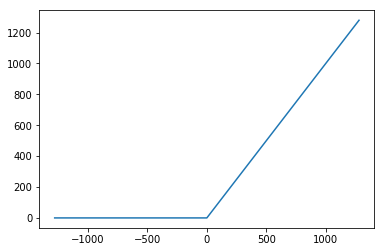

In [5]:
plt.plot(u, x)

Анализ:

In [6]:
H = np.zeros((N,L)) #skeleton for analisis H matrix
pr = (L+len(x)-1) #lengh (number of coloumn) of signal after convolution
Analysis_Mat = np.zeros((N,pr)) #skeleton for matrix after convolution
for k in range(N): #rows
    for n in range(L): #coloumns
        H[k,n] = h[n]*np.cos((np.pi/N)*(k+0.5)*(n+0.5-(N/2))) #analysis H matrix
    Analysis_Mat[k,:] = np.convolve(x,H[k,:]) #convolution

После применения операции свертки, размер нашей входной последовательности закономерно увеличится на $L-1$.

In [7]:
d, c = Analysis_Mat.shape
e = c - L + 1 #length (number of rows) of signal after convolution without last 255
MatCut = Analysis_Mat[:,:e]

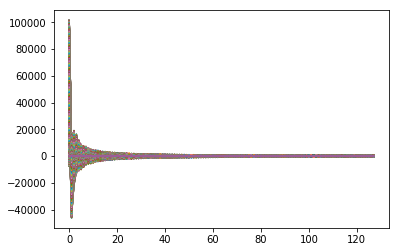

In [8]:
plt.plot(Analysis_Mat[:,:])
plt.show()

Downsampling:

In [9]:
iter128 = int(e/N) #number of rows that sould be stay after downsampling
cutmat = int(np.floor(iter128)*N) #number of rows that sould follow to downsampln block (cut rows that are not fold to N)
Analis = np.zeros((N,iter128)) #skeleton for signal after downsampling
Post_Fin_Mat = MatCut[:,0:cutmat]#input for downsampling block
for j in range(iter128):
    Analis[:,j] = Post_Fin_Mat[:,0+j*N] #downsampling (it may be more simple without loop,of course)

Upsampling:

In [10]:
a, b = Analis.shape 
upsamp = np.zeros((a,b*N)) #skeleton for signal that should be after upsampling
for i in range(b):
    upsamp[:,0+N*i] = Analis[:,i]

Синтез:

In [11]:
m,n= upsamp.shape
R = L + n - 1 #legth of signal (number o rows) that should be after convolution 
Final = np.zeros((N,R)) #skeleton for signal that should be after convolution 
G = (np.fliplr(H))/(N/2) #Synthesis matrix
for k in range(N):
    Final[k,:] = np.convolve(upsamp[k,:], G[k,:]) #convolution
c,d = Final.shape
e  = d-L+1
FinalCut = Final[:,:e]
y = sum(FinalCut)

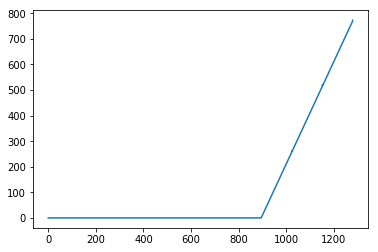

In [12]:
plt.plot(np.array(range(len(y))), y)

### К вопросу об идеальной реконструкции

• Идеальные фильтры не реализуемы;

• Во временной области это означало бы свертку нашего сигнала с sinc-функцией;

• Sinc-функция бесконечно длинная и не причинная (not causal), что означает, что она вызывает бесконечную задержку;

• Мы также не можем просто использовать DFT или FFT для получения идеального фильтра в частотной области;

• Поскольку ДПФ также представляет собой банк фильтров, но особый тип, его эквивалентные фильтры далеки от совершенных фильтров (следовательно, мы не можем сделать с ним идеальные фильтры);

• Не используйте свой глаз (глядя на форму волны), чтобы угадать, что может услышать ухо (совсем другая обработка сигналов).